## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [208]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from geopy.distance import geodesic
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
#importing pandas to read csv file
# Your code here - remember to use markdown cells for comments as well!

In [209]:
kcdf = pd.read_csv('../data/kc_house_data.csv')
#dataset

In [210]:
kcdf = kcdf.drop(columns = ['date', 'yr_renovated'])

In [211]:
kcdf = kcdf.dropna()

In [212]:
kcdf

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,address,lat,long
0,7399300360,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,Gas,PUBLIC,1180,0,0,40,1969,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,Oil,PUBLIC,1570,1570,0,240,1950,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,Gas,PUBLIC,1580,1580,0,0,1956,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,Gas,PUBLIC,1090,1070,200,270,2010,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,Electricity,PUBLIC,1120,550,550,30,2012,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,1555000.0,5,2.0,1910,4000,1.5,NO,NO,NO,...,Oil,PUBLIC,1600,1130,0,210,1921,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
30151,194000695,1313000.0,3,2.0,2020,5800,2.0,NO,NO,NO,...,Gas,PUBLIC,2020,0,0,520,2011,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
30152,7960100080,800000.0,3,2.0,1620,3600,1.0,NO,NO,YES,...,Gas,PUBLIC,940,920,240,110,1995,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
30153,2781280080,775000.0,3,2.5,2570,2889,2.0,NO,NO,NO,...,Gas,PUBLIC,1830,740,480,100,2006,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908


In [213]:
def zip_code(address):
    x = address.split(' ')[-3]

    return x.split(',')[0]

In [214]:
kcdf['zip_code'] = kcdf['address'].apply(lambda x: zip_code(x))

In [215]:
kcdf['zip_code'] = kcdf['zip_code'].astype(int)

0        98055
1        98133
2        98178
3        98118
4        98027
         ...  
30150    98103
30151    98116
30152    98122
30153    98055
30154    98148
Name: zip_code, Length: 30111, dtype: int32

In [218]:
kcdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30111 non-null  int64  
 1   price          30111 non-null  float64
 2   bedrooms       30111 non-null  int64  
 3   bathrooms      30111 non-null  float64
 4   sqft_living    30111 non-null  int64  
 5   sqft_lot       30111 non-null  int64  
 6   floors         30111 non-null  float64
 7   waterfront     30111 non-null  object 
 8   greenbelt      30111 non-null  object 
 9   nuisance       30111 non-null  object 
 10  view           30111 non-null  object 
 11  condition      30111 non-null  object 
 12  grade          30111 non-null  object 
 13  heat_source    30111 non-null  object 
 14  sewer_system   30111 non-null  object 
 15  sqft_above     30111 non-null  int64  
 16  sqft_basement  30111 non-null  int64  
 17  sqft_garage    30111 non-null  int64  
 18  sqft_p

In [216]:
realkcdf = kcdf[(kcdf['zip_code'] >= 98000) & (kcdf['zip_code'] < 99000)]

TypeError: '>=' not supported between instances of 'str' and 'int'

In [184]:
realkcdf

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,address,lat,long,zip_code
0,7399300360,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,PUBLIC,1180,0,0,40,1969,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,98055
1,8910500230,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,PUBLIC,1570,1570,0,240,1950,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,98133
2,1180000275,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,PUBLIC,1580,1580,0,0,1956,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,98178
3,1604601802,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,PUBLIC,1090,1070,200,270,2010,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,98118
4,8562780790,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,PUBLIC,1120,550,550,30,2012,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,98027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,1555000.0,5,2.0,1910,4000,1.5,NO,NO,NO,...,PUBLIC,1600,1130,0,210,1921,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,98103
30151,194000695,1313000.0,3,2.0,2020,5800,2.0,NO,NO,NO,...,PUBLIC,2020,0,0,520,2011,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,98116
30152,7960100080,800000.0,3,2.0,1620,3600,1.0,NO,NO,YES,...,PUBLIC,940,920,240,110,1995,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,98122
30153,2781280080,775000.0,3,2.5,2570,2889,2.0,NO,NO,NO,...,PUBLIC,1830,740,480,100,2006,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,98055


In [185]:
realkcdf['zip_code'].nunique()

91

In [8]:
#am_cords = (47.615722, -122.339494)

In [9]:
#kcdf['location'] = list(zip(kcdf.lat, kcdf.long))

In [10]:
#kcdf['distance_to_amazon'] = kcdf['location'].apply(lambda x: geodesic(x, am_cords).miles)

In [11]:
#closekcdf = kcdf[kcdf['distance_to_amazon'] <= 10]

In [95]:
#closekcdf

In [93]:
#q1 = closekcdf['price'].quantile(.25)
#q3 = closekcdf['price'].quantile(.75)
#IQR = q3 - q1
#outliers = closekcdf[((closekcdf['price']<(q1-1.5*IQR)) | (closekcdf['price']>(q3+1.5*IQR)))]

In [94]:
#outliers

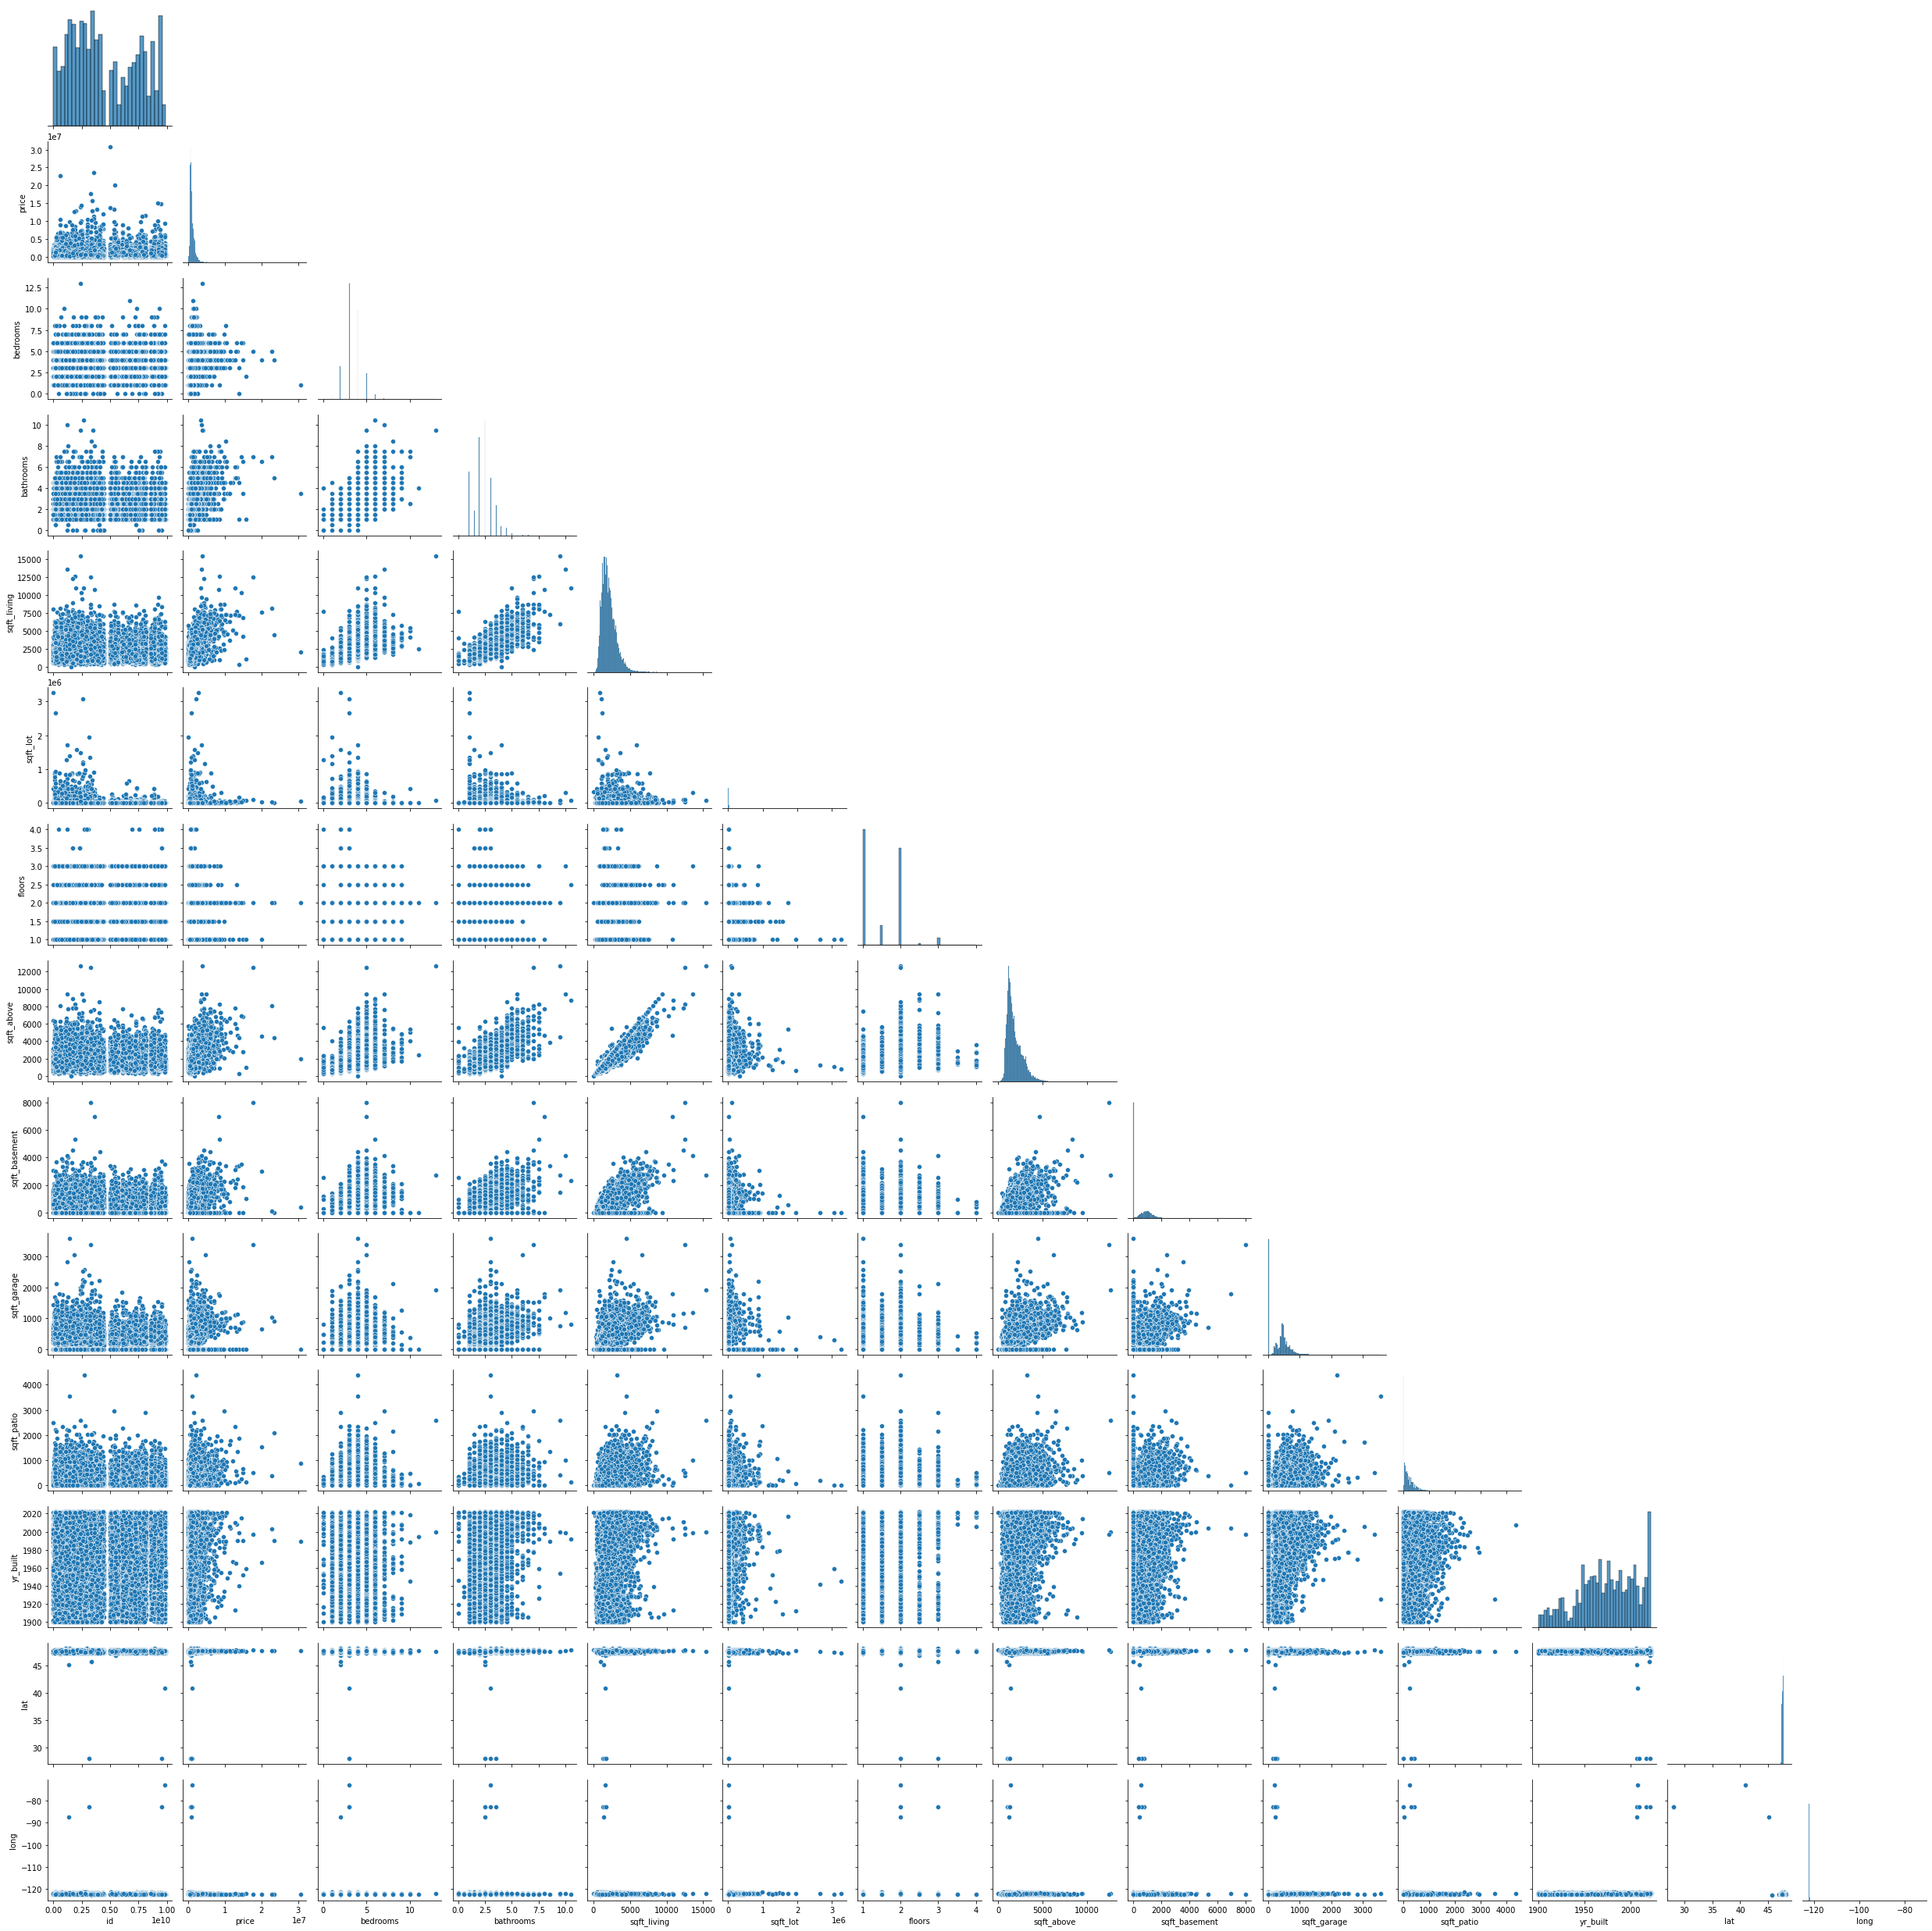

In [186]:
sns.pairplot(realkcdf, corner = True)

<AxesSubplot:>

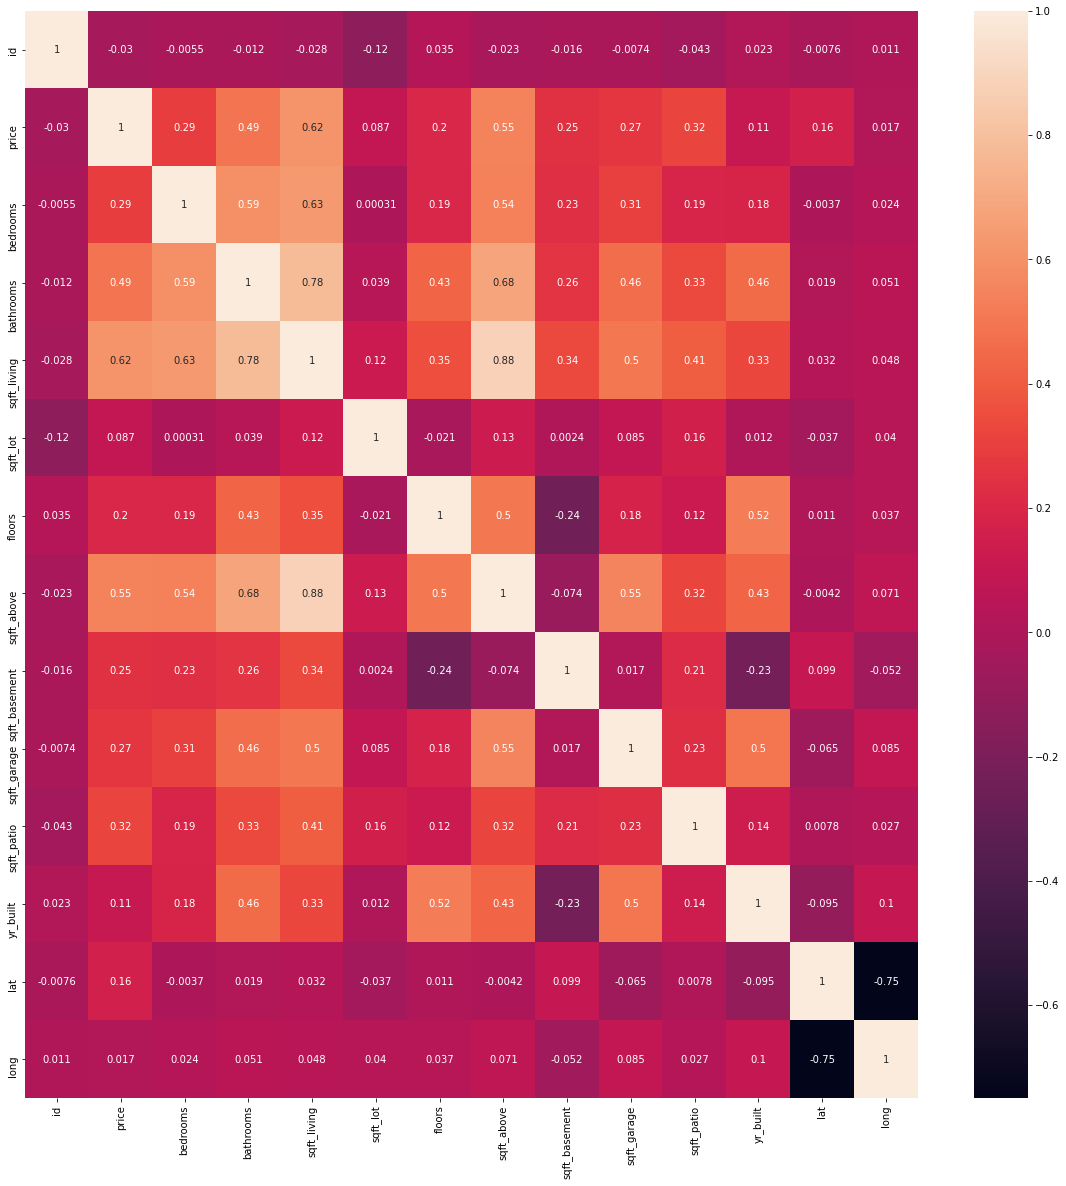

In [187]:
plt.figure(figsize = (20,20))
sns.heatmap(realkcdf.corr(), annot = True)

In [188]:
realkcdf['grade'].unique()

array(['7 Average', '9 Better', '8 Good', '6 Low Average', '10 Very Good',
       '5 Fair', '11 Excellent', '12 Luxury', '4 Low', '13 Mansion',
       '3 Poor', '2 Substandard'], dtype=object)

In [189]:
realkcdf['condition'].unique()

array(['Good', 'Average', 'Very Good', 'Fair', 'Poor'], dtype=object)

In [190]:
grade_list = ['2 Substandard','3 Poor','4 Low','5 Fair','6 Low Average', '7 Average', '8 Good', '9 Better', '10 Very Good', '11 Excellent','12 Luxury','13 Mansion']
cond_list = ['Poor', 'Fair', 'Average', 'Good', 'Very Good']
view_list = ['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT']

In [191]:
o_enc = OrdinalEncoder(categories = [grade_list, cond_list, view_list])
ord_df =pd.DataFrame(o_enc.fit_transform(realkcdf[['grade', 'condition', 'view']]), columns = realkcdf[['grade', 'condition', 'view']].columns)

In [192]:
new_kcdf = pd.concat([realkcdf.reset_index().drop(columns = ['grade', 'condition', 'view']), ord_df],1)

In [193]:
new_kcdf

,index,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_garage,sqft_patio,yr_built,address,lat,long,zip_code,grade,condition,view
0,0,7399300360,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,0,40,1969,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,98055,5.0,3.0,0.0
1,1,8910500230,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,0,240,1950,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,98133,5.0,2.0,2.0
2,2,1180000275,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,0,0,1956,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,98178,5.0,2.0,2.0
3,3,1604601802,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,200,270,2010,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,98118,7.0,2.0,2.0
4,4,8562780790,592500.0,2,2.0,1120,758,2.0,NO,NO,...,550,30,2012,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,98027,5.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29201,30150,7834800180,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,0,210,1921,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,98103,6.0,3.0,0.0
29202,30151,194000695,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,0,520,2011,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,98116,5.0,2.0,1.0
29203,30152,7960100080,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,240,110,1995,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,98122,5.0,2.0,0.0
29204,30153,2781280080,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,480,100,2006,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,98055,6.0,2.0,0.0


In [194]:
onehot_enc = OneHotEncoder(sparse = True, handle_unknown = 'ignore')

In [195]:
nominal_cols = ['waterfront', 'greenbelt', 'heat_source', 'sewer_system','zip_code']

In [196]:
ohe_df =onehot_enc.fit_transform(new_kcdf[nominal_cols])

In [197]:
nominal_df = pd.DataFrame(ohe_df.toarray(),columns = onehot_enc.get_feature_names())

In [198]:
cleandf = pd.concat([new_kcdf.drop(columns = ['waterfront', 'greenbelt', 'heat_source', 'sewer_system', 'zip_code']), nominal_df],1)

In [204]:
cleandf

,index,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,nuisance,sqft_above,...,x4_98271,x4_98272,x4_98288,x4_98296,x4_98338,x4_98354,x4_98372,x4_98387,x4_98422,x4_98663
0,0,7399300360,675000.0,4,1.0,1180,7140,1.0,NO,1180,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,8910500230,920000.0,5,2.5,2770,6703,1.0,YES,1570,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1180000275,311000.0,6,2.0,2880,6156,1.0,NO,1580,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1604601802,775000.0,3,3.0,2160,1400,2.0,NO,1090,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,8562780790,592500.0,2,2.0,1120,758,2.0,YES,1120,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29201,30150,7834800180,1555000.0,5,2.0,1910,4000,1.5,NO,1600,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29202,30151,194000695,1313000.0,3,2.0,2020,5800,2.0,NO,2020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29203,30152,7960100080,800000.0,3,2.0,1620,3600,1.0,YES,940,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29204,30153,2781280080,775000.0,3,2.5,2570,2889,2.0,NO,1830,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [200]:
lr = LinearRegression()

In [205]:
col_select = cleandf.drop(columns = ['price', 'id', 'index', 'nuisance', 'address']).columns
X = cleandf[col_select]
y = cleandf['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [206]:
lr.fit(X_train, y_train)

LinearRegression()

In [207]:
lr.score(X_train, y_train)

0.6711564883889991

In [164]:
y_pred = lr.predict(X_test)
y_pred[0:10]

array([ 622122.60349347, 1314747.79930922,  566913.89412242,
       1807295.26530583,  539769.95444041, 1645038.53109089,
       1368334.71142204, 1676195.11801288, 1973198.44702025,
        695388.8102041 ])

In [165]:
lr.score(X_train,y_train)

0.6572524998863988

In [166]:
MAE = mean_absolute_error(y_pred, y_test)
MAE

270490.21391727694

In [167]:
ss = StandardScaler()

In [168]:
ss.fit(X_train)

StandardScaler()

In [169]:
X_standardized_train = ss.fit_transform(X_train)

In [170]:
X_standardized_test = ss.transform(X_test)

In [171]:

lr.fit(X_standardized_train, y_train)

lr.score(X_standardized_train, y_train)

0.6539853076020345

In [172]:
lr.score(X_standardized_test, y_test)

-2.476042365680413e+22

In [174]:
mean_absolute_error(y_pred, y_test)

270490.21391727694